# Calculate label data from Google News reports data

(-3.1500000000000004, 3.1500000000000004)

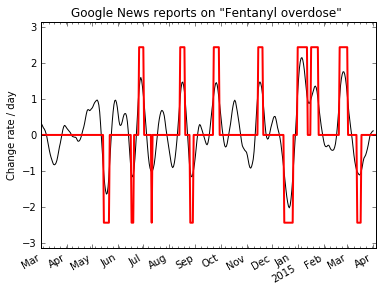

In [2]:
import pandas as pd
import numpy as np
import pylab as plt
import datetime as dt
import math
import matplotlib.dates as mdates
%matplotlib inline

# label parameters
firstDate = dt.datetime(2014, 3, 1)
fullDateRange = 400
numberOfGNhits = pd.read_csv("./data/fentanylANDdeathORoverdose_2014_01_01_to_2015_04_015.csv")

dates=[]
numberOfHits = []
fig = plt.figure()
for hit in numberOfGNhits['date']:
    dates.append (dt.datetime.strptime(hit,"%Y-%m-%d"))

numHitsList = []
for hit in numberOfGNhits['numHits']:
    hit=hit.replace('[','')
    hit=hit.replace(']','')
    numHitsList.append( int(hit) )
    
df_hits=pd.Series(numHitsList, index = dates)

# smoothing
smoothWindowWidth = 30
df_hitsSmooth=df_hits.rolling(smoothWindowWidth,center=True,win_type='blackman').mean()

# convert to raising/falling/constant time series
hitsConstantDetectrange = 1
hitsUpDown = []
for gradHit in df_hitsSmooth.diff():
    if math.isnan(gradHit):
        hitsUpDown.append(0)
    elif gradHit>=hitsConstantDetectrange:
        hitsUpDown.append(1)
    elif gradHit<=-hitsConstantDetectrange:
        hitsUpDown.append(-1)
    else:
        hitsUpDown.append(0)
df_hitsUpDown=pd.Series(hitsUpDown, index = dates)

# selected time range
y_linear = df_hitsSmooth[firstDate:firstDate+dt.timedelta(fullDateRange-1)]
# derivative
y_diff = df_hitsSmooth.diff()[firstDate:firstDate+dt.timedelta(fullDateRange-1)]
#digital classified
y = df_hitsUpDown[firstDate:firstDate+dt.timedelta(fullDateRange-1)]

# plot timeseries
fig, ax = plt.subplots(1,figsize=(6, 4.5))
# y_linear.plot()
y_diff.plot(color='black', linewidth=1.0)
(y*y_diff.std()*3).plot(color='red', linewidth=2.0)

plt.title("""Google News reports on "Fentanyl overdose" """)
plt.ylabel('Change rate / day')
fig.autofmt_xdate() # rotate and align the tick labels 
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d') # use a more precise date string
yLim = ax.get_ylim()  # add some space top and bottom
ax.set_ylim(-yLim[1]*1.05, yLim[1]*1.05)

## Savel label data

In [3]:
# save feature labels
y.to_pickle('./data/GNreports_y.pkl')
y_linear.to_pickle('./data/GNreports__yLinear.pkl')
y_diff.to_pickle('./data/GNreports__yDiff.pkl')
print 'y data saved'

y data saved
